In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Training.csv")

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
df['prognosis'].value_counts(normalize = True)

(vertigo) Paroymsal  Positional Vertigo    0.02439
Hypothyroidism                             0.02439
Dengue                                     0.02439
Allergy                                    0.02439
Hyperthyroidism                            0.02439
Arthritis                                  0.02439
Chicken pox                                0.02439
Acne                                       0.02439
Bronchial Asthma                           0.02439
Jaundice                                   0.02439
Dimorphic hemmorhoids(piles)               0.02439
Common Cold                                0.02439
Hepatitis C                                0.02439
Psoriasis                                  0.02439
Varicose veins                             0.02439
Hypoglycemia                               0.02439
Hypertension                               0.02439
Urinary tract infection                    0.02439
Hepatitis E                                0.02439
Drug Reaction                  

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

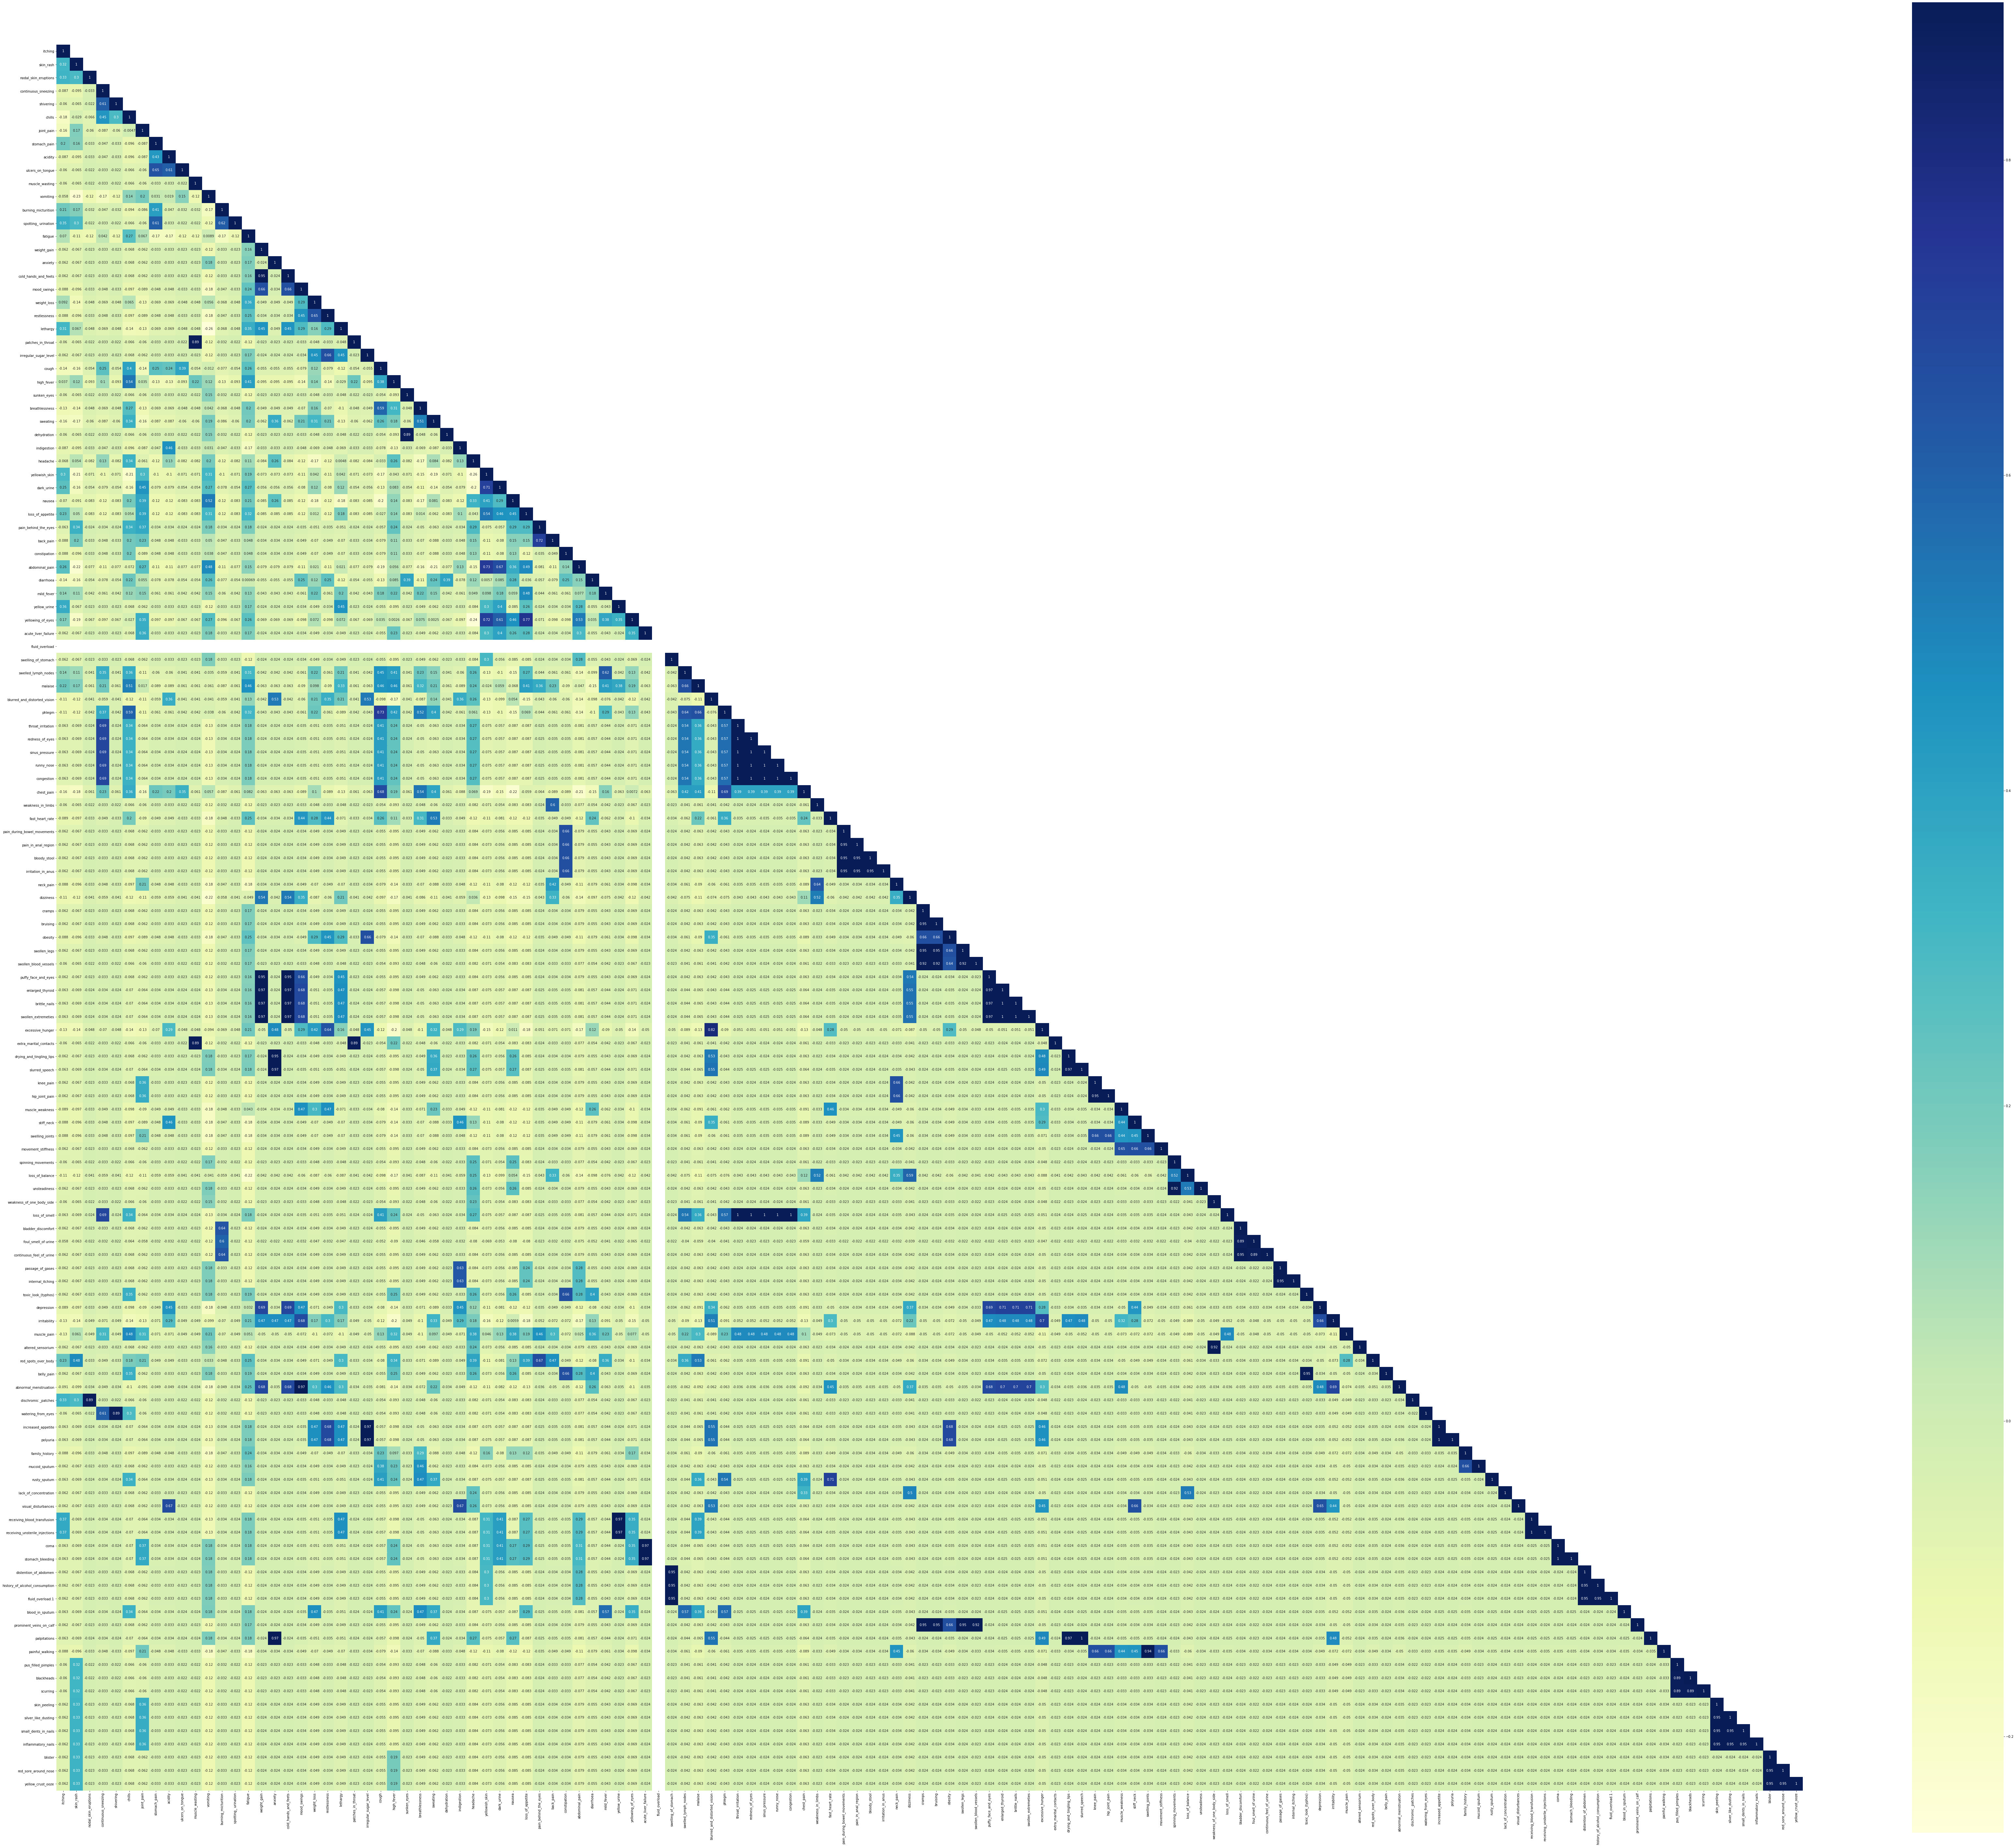

In [7]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [8]:
from scipy.stats import chi2_contingency

In [9]:
chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

(4362.40173527245,
 0.0,
 1,
 array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [10]:
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

In [13]:
#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [14]:
from sklearn.metrics import accuracy_score
y_pred = mnb.predict(x_test)
accuracy_score(y_pred,y_test)

1.0

In [15]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [16]:
real_diseases = y_test.values
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Migraine Actual:Migraine
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Hepatitis E Actual:Hepatitis E
Pred: Jaundice Actual:Jaundice
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: Hepatitis D Actual:Hepatitis D
Pred: Peptic ulcer diseae Actual:Peptic ulcer diseae
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Common Cold Actual:Common Cold
Pred: Allergy Actual:Allergy
Pred: Drug Reaction Actual:Drug Reaction
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: Allergy Actual:Allergy
Pred: Dengue Actual:Dengue
Pred: Chicken pox Actual:Chicken pox
Pred: Hepatitis E Actual:Hepatitis E
Pred: Osteoarthristis Actual:Osteoarthristis
Pred: Common Cold Actual:Common Cold
Pred: Hepatitis C Actual:Hepatitis C
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actual:Allergy
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic he

Pred: Hepatitis C Actual:Hepatitis C
Pred: Dengue Actual:Dengue
Pred: Hepatitis B Actual:Hepatitis B
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Allergy Actual:Allergy
Pred: Paralysis (brain hemorrhage) Actual:Paralysis (brain hemorrhage)
Pred: AIDS Actual:AIDS
Pred: Hepatitis C Actual:Hepatitis C
Pred: Pneumonia Actual:Pneumonia
Pred: Hepatitis B Actual:Hepatitis B
Pred: Acne Actual:Acne
Pred: Typhoid Actual:Typhoid
Pred: Pneumonia Actual:Pneumonia
Pred: Hepatitis C Actual:Hepatitis C
Pred: Hypertension  Actual:Hypertension 
Pred: Fungal infection Actual:Fungal infection
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Tuberculosis Actual:Tuberculosis
Pred: AIDS Actual:AIDS
Pred: Hepatitis D Actual:Hepatitis D
Pred: Acne Actual:Acne
Pred: Common Cold Actual:Common Cold
Pred: Hypertension  Actual:Hypertension 
Pred: Varicose veins Actual:Varicose veins
Pred: Allergy Actual:Allergy
Pred: Paralysis (b

Pred: Hepatitis E Actual:Hepatitis E
Pred: Chicken pox Actual:Chicken pox
Pred: Jaundice Actual:Jaundice
Pred: Gastroenteritis Actual:Gastroenteritis
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Malaria Actual:Malaria
Pred: Hepatitis E Actual:Hepatitis E
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Acne Actual:Acne
Pred: Peptic ulcer diseae Actual:Peptic ulcer diseae
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Typhoid Actual:Typhoid
Pred: Drug Reaction Actual:Drug Reaction
Pred: Fungal infection Actual:Fungal infection
Pred: Dengue Actual:Dengue
Pred: Malaria Actual:Malaria
Pred: Allergy Actual:Allergy
Pred: Dengue Actual:Dengue
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis C Actual:Hepatitis C
Pred: (vertigo) Paroymsal  Positional Vertigo Actual:(vertigo) Paroymsal  Positional Vertigo
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Dimorphic hemm

Pred: Typhoid Actual:Typhoid
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Dengue Actual:Dengue
Pred: Varicose veins Actual:Varicose veins
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Jaundice Actual:Jaundice
Pred: Malaria Actual:Malaria
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: (vertigo) Paroymsal  Positional Vertigo Actual:(vertigo) Paroymsal  Positional Vertigo
Pred: (vertigo) Paroymsal  Positional Vertigo Actual:(vertigo) Paroymsal  Positional Vertigo
Pred: Heart attack Actual:Heart attack
Pred: Impetigo Actual:Impetigo
Pred: Jaundice Actual:Jaundice
Pred: Hypertension  Actual:Hypertension 
Pred: Malaria Actual:Malaria
Pred: hepatitis A Actual:hepatitis A
Pred: Drug Reaction Actual:Drug Reaction
Pred: Peptic ulcer diseae Actual:Peptic ulcer diseae
Pred: Diabetes  Actual:Diabetes 
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: (vertigo) Paroymsal  Positional Vertigo Actual:(vertigo) Paroymsal  Positional Vertigo
P

In [17]:
#imported Kfold
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores) 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [19]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb}
algo_train_scores={}
algo_test_scores={}
#decision tree was found to be best fit with training score of 0.1 and testing score of 0.87 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8731707317073171, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.9975609756097561, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


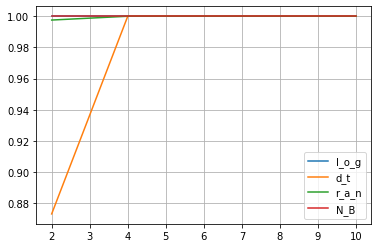

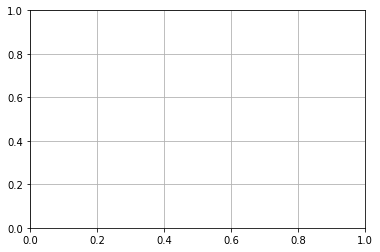

In [20]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)
df_test.plot(grid = 1)
plt.show()
plt.grid()

In [21]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [22]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.875609756097561}


In [23]:
#saved the model 
from sklearn.externals import joblib
joblib.dump(dt,'health_model')

['health_model']

In [34]:
a = list(range(2,134))
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = dt.predict([a])
y_pred_2 = dt.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))

Enter your name :skjda
Enter your age:23
2: itching
3: skin_rash
4: nodal_skin_eruptions
5: continuous_sneezing
6: shivering
7: chills
8: joint_pain
9: stomach_pain
10: acidity
11: ulcers_on_tongue
12: muscle_wasting
13: vomiting
14: burning_micturition
15: spotting_ urination
16: fatigue
17: weight_gain
18: anxiety
19: cold_hands_and_feets
20: mood_swings
21: weight_loss
22: restlessness
23: lethargy
24: patches_in_throat
25: irregular_sugar_level
26: cough
27: high_fever
28: sunken_eyes
29: breathlessness
30: sweating
31: dehydration
32: indigestion
33: headache
34: yellowish_skin
35: dark_urine
36: nausea
37: loss_of_appetite
38: pain_behind_the_eyes
39: back_pain
40: constipation
41: abdominal_pain
42: diarrhoea
43: mild_fever
44: yellow_urine
45: yellowing_of_eyes
46: acute_liver_failure
47: fluid_overload
48: swelling_of_stomach
49: swelled_lymph_nodes
50: malaise
51: blurred_and_distorted_vision
52: phlegm
53: throat_irritation
54: redness_of_eyes
55: sinus_pressure
56: runny_no

## disease dekhabo na
#### piles ashe tahole common yoga dekhiye debe